In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from measurement.measures import Weight, Volume #did not use this 

In [2]:
# Define the rules for categorizing items by keyword
categories = {
    'Bakery': ['durum', 'salt', 'sugar'],
    'Canned goods': ['kidney beans', 'mushroom', 'tomato puree'],
    'Dairy': ['butter', 'cheese', 'egg', 'eggs', 'milk', 'yogurt'],
    'Fish': ['salmon', 'tuna'],
    'Fruits': ['apple', 'orange', 'tangerine'],
    'Grains': ['bread', 'flour', 'musli', 'pasta', 'rice'],
    'Meat': ['beef', 'chicken', 'chicken breast', 'pork'],
    'Oil': ['cooking oil', 'olive oil'],
    'Spices': ['chilli powder', 'garam masala', 'garlic paste', 'garlic powder', 'ginger paste', 'turmeric powder'],
    'Vegetables': ['carrot', 'garlic', 'onion', 'potatoes', 'tomato']   
}

#categories case sensitive
#three catagories liquid, solids and peices ()????


# Load data into a pandas DataFrame
grocery_data = pd.read_csv('Grocery_list_I.csv')

# create new column
grocery_data['Category'] = ''

#categorize
for index, row in grocery_data.iterrows():
    item_name = row['Current Items'].lower()
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in item_name:
                grocery_data.at[index, 'Category'] = category
                break

#Generate updated csv file 
grocery_data.to_csv('categorized_grocery_items.csv', index=False)

In [3]:
categorized_df = pd.read_csv('categorized_grocery_items.csv')
categorized_df_sorted = categorized_df.sort_values(by='Category')
categorized_df_sorted

,Current Items,Quantity,Unit,Category
17,Salt,250,gram,Bakery
3,Durum,8,Piece,Bakery
8,Sugar,1,Kilogram,Bakery
6,Mushroom,250,gram,Canned goods
7,Kidney Beans,250,gram,Canned goods
13,Cheese,500,gram,Dairy
1,Eggs,10,Piece,Dairy
12,Milk,2,Litre,Dairy
11,Butter,500,gram,Dairy
26,Tuna,250,gram,Fish


In [4]:
categorized_df_sorted.loc[categorized_df_sorted['Unit'] == 'gram', 'Quantity'] /= 1000
categorized_df_sorted.loc[categorized_df_sorted['Unit'] == 'gram', 'Unit'] = 'Kilogram'

In [5]:
categorized_df_sorted.loc[categorized_df_sorted['Unit'] == 'MilliLitre', 'Quantity'] /= 1000
categorized_df_sorted.loc[categorized_df_sorted['Unit'] == 'MilliLitre', 'Unit'] = 'Litre'

In [6]:
categorized_df_sorted

,Current Items,Quantity,Unit,Category
17,Salt,0.25,Kilogram,Bakery
3,Durum,8.00,Piece,Bakery
8,Sugar,1.00,Kilogram,Bakery
6,Mushroom,0.25,Kilogram,Canned goods
7,Kidney Beans,0.25,Kilogram,Canned goods
13,Cheese,0.50,Kilogram,Dairy
1,Eggs,10.00,Piece,Dairy
12,Milk,2.00,Litre,Dairy
11,Butter,0.50,Kilogram,Dairy
26,Tuna,0.25,Kilogram,Fish


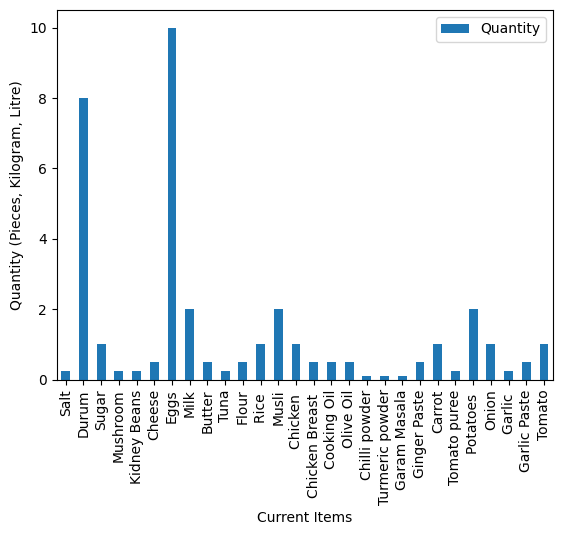

In [7]:
x = categorized_df_sorted.plot(kind='bar', x='Current Items', y='Quantity')
x.set_xlabel('Current Items')
x.set_ylabel('Quantity (Pieces, Kilogram, Litre)')
plt.show()

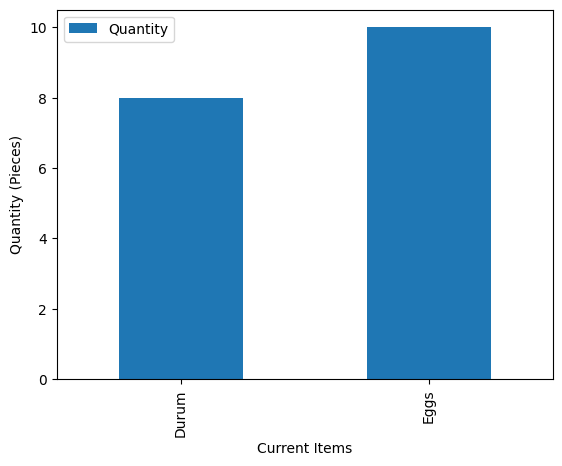

In [8]:
piece_df = categorized_df_sorted.loc[categorized_df_sorted['Unit']== 'Piece']
a = piece_df.plot(kind='bar', x='Current Items', y='Quantity')
a.set_xlabel('Current Items')
a.set_ylabel('Quantity (Pieces)')
plt.show()

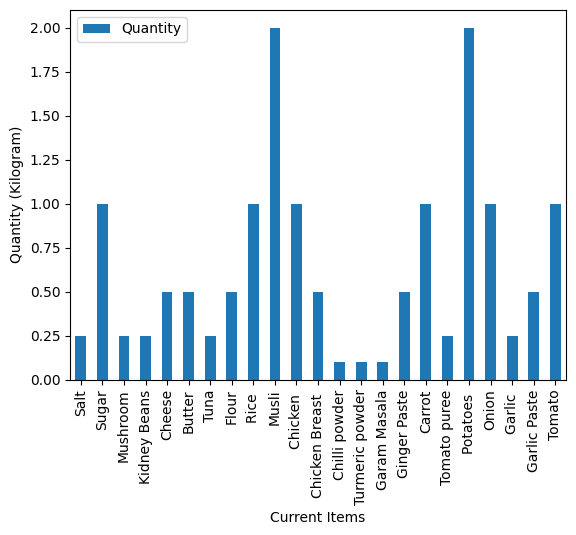

In [9]:
kilogram_df = categorized_df_sorted.loc[categorized_df_sorted['Unit']== 'Kilogram']
b = kilogram_df.plot(kind='bar', x='Current Items', y='Quantity')
b.set_xlabel('Current Items')
b.set_ylabel('Quantity (Kilogram)')
plt.show()

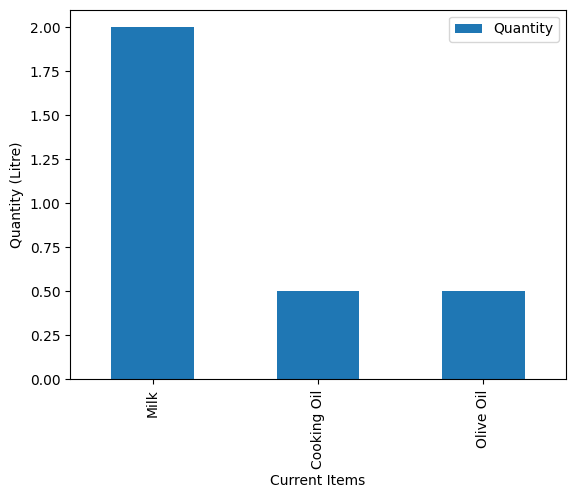

In [10]:
litre_df = categorized_df_sorted.loc[categorized_df_sorted['Unit']== 'Litre']
c = litre_df.plot(kind='bar', x='Current Items', y='Quantity')
c.set_xlabel('Current Items')
c.set_ylabel('Quantity (Litre)')
plt.show()
